<a href="https://colab.research.google.com/github/IvanOM-97/DPro-Exercises/blob/master/U36T1C69SVMSeriesAssignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
SVM (Support Vector Machine)
  ACERCA DEL ESTE SPRINT
    Objetivo del Sprint
      Comprender el funcionamiento de las Máquinas de Vectores de Soporte (SVM) a través de su implementación desde cero.
      Familiarizarse con un método diferente a los modelos lineales.
    Cómo aprenderemos
      Después de implementar una SVM desde cero, realizaremos el entrenamiento y la validación del modelo.

  SVM DESDE CERO
    Crearemos una clase de Máquina de Vectores de Soporte (SVM) para clasificación implementada desde cero, utilizando únicamente librerías mínimas como NumPy para desarrollar el algoritmo.
    Dentro de las SVM existen dos variantes principales:
      SVM de margen blando (Soft Margin SVM):
        permite algunos errores de clasificación durante el entrenamiento.
      SVM de margen duro (Hard Margin SVM):
        no permite errores de clasificación.

    En este caso, trabajaremos con la SVM de margen duro, ya que su implementación es más sencilla.
    Se proporciona a continuación una plantilla (ScratchSVMClassifier) en la cual deberás escribir el código necesario para completar la implementación.
'''

[ 1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1. -1.  1.
  1.  1.  1. -1. -1.  1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.  1.
 -1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1.  1.
 -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1.  1. -1. -1.  1.
 -1. -1.  1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1.
  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.]
accuracy: {} 1.0
precision: {} 1.0
recall: {} 1.0
f1_score: {} 1.0


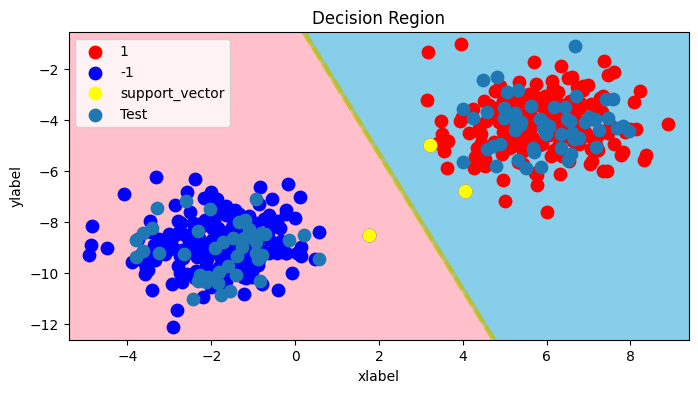

In [21]:
# PLANTILLA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class ScratchSVMClassifier():
    """
    Scratch Implementation of SVM Classifier
      Parameters
        num_iter : int
        Number of iterations
        lr : float
        Learning rate
        kernel : str
        Type of kernel. Either linear kernel (linear) or polynomial kernel (poly)
        threshold : float
        Threshold for selecting support vectors
        verbose : bool
        Set to True to output the learning process

      Attributes
        self.n_support_vectors : int
        Number of support vectors
        self.index_support_vectors : ndarray of shape (n_support_vectors,)
        Indices of the support vectors
        self.X_sv : ndarray of shape (n_support_vectors, n_features)
        Features of the support vectors
        self.lam_sv : ndarray of shape (n_support_vectors, 1)
        Lagrange multipliers of the support vectors
        self.y_sv : ndarray of shape (n_support_vectors, 1)
        Labels of the support vectors
    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False, d=1, gamma=1, theta=0):
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.degree = d
        self.gamma = gamma
        self.theta = theta

    # PROBLEMA 1 - DESCENSO MAS PRONUNCIADO SEGUN EL METODO DEL MULTIPLICADOR DE LAGRANGE
    def _update_lambda(self, X, y):
        n = X.shape[0]
        for i in range(n):
          update_sum = 0
          for j in range(n):
            update_sum += self.lamda[j]*y[i]*y[j]*self._kernel(X[i],X[j])

          self.lamda[i] += self.lr*(1 - update_sum)
          if self.lamda[i] < 0:
            self.lamda[i] = 0

    # PROBLEMA 2 - DETERMINANDO LOS VECTORES DE SOPORTE
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Train the SVM classifier.
          If validation data is provided, the accuracy on it is also calculated at each iteration.
          Parameters
            X : ndarray of shape (n_samples, n_features)
            Features of the training data
            y : ndarray of shape (n_samples,)
            True labels of the training data
            X_val : ndarray of shape (n_samples, n_features)
            Features of the validation data
            y_val : ndarray of shape (n_samples,)
            True labels of the validation data
        """
        self.label = np.unique(y)
        y = np.where(y == self.label[0], -1, 1)
        self.lamda = np.random.rand(len(X))
        for i in range(self.iter):
          self._update_lambda(X, y)
          if self.verbose:
              print("iteration: {}, lamda: {}".format(i, self.lamda))

        self.index_support_vector = np.where(self.lamda > self.threshold)[0]
        self.X_sv = X[self.index_support_vector,:]
        self.y_sv = y[self.index_support_vector].reshape(-1, 1)
        self.lam_sv = self.lamda[self.index_support_vector].reshape(-1, 1)
        self.n_support_vectors = len(self.lam_sv)

    #PROBLEMA 3 - PRESUNCION
    def predict(self, X):
        """
        Estimate labels using the SVM classifier.
          Parameters
            X : ndarray of shape (n_samples, n_features)
            Samples
          Returns
            ndarray of shape (n_samples, 1)
            Estimated results from the SVM classifier
        """
        n = X.shape[0]
        y_pred = np.zeros(n)
        for i in range(n):
          temp = 0
          for j in range(self.n_support_vectors):
            temp += self.lam_sv[j] * self.y_sv[j] * self._kernel(X[i], self.X_sv[j])
          if temp >= 0:
            y_pred[i] = self.label[1]

          else:
            y_pred[i] = self.label[0]

        return y_pred

    # PROBLEMA 6 - CREANDO UNA FUNCION KERNEL POLINOMIAL
    def _kernel(self, X_i, X_j):
        if self.kernel == 'linear':
          return np.dot(X_i, X_j.T)

        elif self.kernel == 'poly':
          gamma = 1
          theta = 1
          return (gamma * np.dot(X_i, X_j.T) + theta) ** self.degree

        else:
          raise ValueError("Unsupported kernel type")

# PROBLEMA 4 - APRENDIZAJE Y ESTIMACION
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X, y = datasets.make_blobs(n_samples = 500, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

#sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
#plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, train_size=0.8)
model = ScratchSVMClassifier(num_iter=100, lr=0.01, kernel='linear', verbose=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

def evaluate(y_pred, y_test):
    print("accuracy: {}",format(accuracy_score(y_test, y_pred)))
    print("precision: {}",format(precision_score(y_test, y_pred)))
    print("recall: {}",format(recall_score(y_test, y_pred)))
    print("f1_score: {}",format(f1_score(y_test, y_pred)))

evaluate(y_pred, y_test)

# PROBLEMA 5 - VISUALIZACION DE REGIONES DE DECISION
def decision_region(X, y, model, step= 0.01, title= 'Decision Region',
                    xlabel= 'xlabel', yalbel= 'ylabel', target_names= ['1', '-1']):
    import matplotlib.patches as mpatches
    from matplotlib.colors import ListedColormap
    # Setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # Pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])- 0.5, np.max(X[:,0])+ 0.5, step),
                                   np.arange(np.min(X[:,1])- 0.5, np.max(X[:,1])+ 0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # Plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(yalbel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:,0], X[y==target][:,1], s=80, color= scatter_color[i], label= target_names[i], marker='o')

    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(model.X_sv[:,0], model.X_sv[:,1], color='yellow', s=80, label='support_vector')
    plt.legend(handles=patches)
    plt.legend()
    #plt.show()

fig, ax = plt.subplots(figsize = (8,4))
decision_region(X_train, y_train, model)
plt.scatter(X_test[:,0], X_test[:,1], s=80, label="Test")
plt.legend();

accuracy: {} 1.0
precision: {} 1.0
recall: {} 1.0
f1_score: {} 1.0


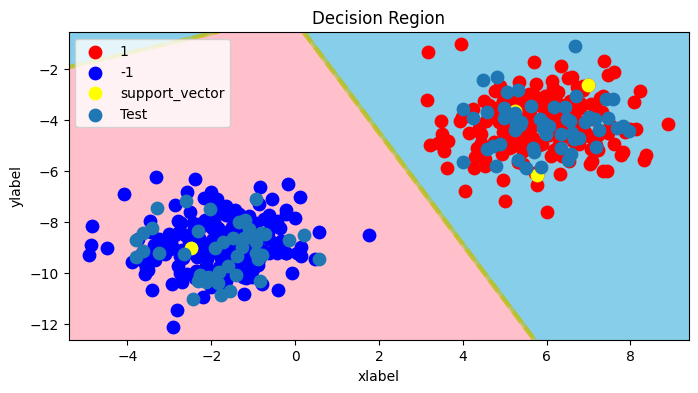

In [22]:
# PROBLEMA 6 - CREACION DE UN KERNEL POLINOMIAL
model2 = ScratchSVMClassifier(num_iter=100, lr=0.01, kernel='poly', verbose=False, d=2)
model2.fit(X_train, y_train)
y_pred_polly = model.predict(X_test)
evaluate(y_pred= y_pred_polly, y_test= y_test)


fig, ax = plt.subplots(figsize = (8,4))
decision_region(X_train, y_train, model2)
plt.scatter(X_test[:,0], X_test[:,1], s=80, label="Test")
plt.legend();